In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
stock = '^NSEBANK'
data = yf.download(stock,'2010-01-01','2023-05-19')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,9031.900391,9129.450195,9031.900391,9112.349609,9112.244141,0
2010-01-05,9191.250000,9214.000000,9157.349609,9192.150391,9192.043945,0
2010-01-06,9243.900391,9265.549805,9183.650391,9223.000000,9222.892578,0
2010-01-07,9240.250000,9261.849609,9153.250000,9192.950195,9192.843750,0
2010-01-08,9185.049805,9214.349609,9141.450195,9160.700195,9160.593750,0


In [5]:
price = data['Close']
price

Date
2010-01-04     9112.349609
2010-01-05     9192.150391
2010-01-06     9223.000000
2010-01-07     9192.950195
2010-01-08     9160.700195
                  ...     
2023-05-12    43793.550781
2023-05-15    44072.101562
2023-05-16    43903.699219
2023-05-17    43698.699219
2023-05-18    43752.300781
Name: Close, Length: 3010, dtype: float64

<Axes: xlabel='Date'>

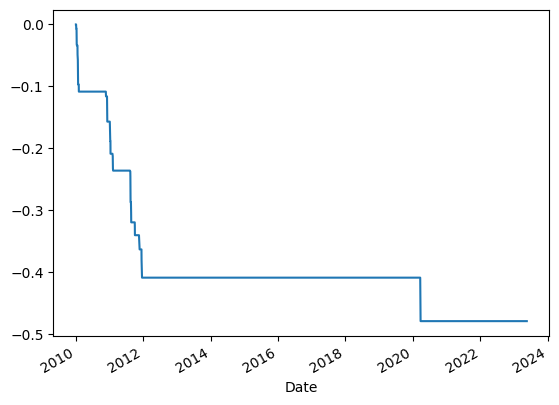

In [6]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [7]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")


Maximum Drawdown for the given period is: -47.85560100199557 %


In [8]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.00875743,  0.00335608, ..., -0.00382106,
       -0.00466931,  0.00122662])

In [9]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 1.00875743, 1.0121429 , ..., 4.81804376, 4.79554682,
       4.80142912])

In [10]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 480.1429121665449%


In [11]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.324201
2012-12-31    0.565416
2013-12-31   -0.087300
2014-12-31    0.645695
2015-12-31   -0.124782
2016-12-31    0.108457
2017-12-31    0.405027
2018-12-31    0.063461
2019-12-31    0.184146
2020-12-31   -0.027909
2021-12-31    0.134904
2022-12-31    0.211510
2023-12-31    0.017816
Freq: A-DEC, Name: Close, dtype: float64

In [12]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28    0.008230
2010-03-31    0.084474
2010-04-30    0.043421
2010-05-31   -0.051330
                ...   
2023-01-31   -0.054236
2023-02-28   -0.009495
2023-03-31    0.008433
2023-04-30    0.064648
2023-05-31    0.011991
Freq: M, Name: Close, Length: 161, dtype: float64

In [13]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 13.632616352928306%


In [14]:
sharpe_ratio = (avg_yearly_return - 0.07)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 8.69224964185592


In [15]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-05-31   -0.051330
2010-10-31   -0.002879
2010-11-30   -0.030667
2010-12-31   -0.013482
2011-01-31   -0.097494
                ...   
2022-06-30   -0.058113
2022-09-30   -0.022885
2022-12-31   -0.005657
2023-01-31   -0.054236
2023-02-28   -0.009495
Name: Close, Length: 67, dtype: float64

In [16]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.07)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 12.740197734307968
